This notebook shows an example of how to calculate the similarity between two sets of SMILES

In [1]:
import os
import sys

# get the current script's directory
current_dir = os.path.abspath('')

# get the parent directory by going one level up
parent_dir = os.path.dirname(current_dir)

# add the parent directory to sys.path
sys.path.append(parent_dir)

In [2]:
import numpy as np
import pandas as pd

from rdkit import Chem

from cheminformatics_similarity.get_similarity import get_similarity_matrix

In [3]:
df_esol = pd.read_csv('data/ESOL/delaney.csv')
df_esol

,smiles,logSolubility
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.770
1,Cc1occc1C(=O)Nc2ccccc2,-3.300
2,CC(C)=CCCC(C)=CC(=O),-2.060
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.870
4,c1ccsc1,-1.330
...,...,...
1123,FC(F)(F)C(Cl)Br,-1.710
1124,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106
1125,CCSCCSP(=S)(OC)OC,-3.091
1126,CCC(C)C,-3.180


In [4]:
df_esol['inchi_key'] = df_esol.smiles.apply(lambda x: Chem.inchi.MolToInchiKey(Chem.MolFromSmiles(x)) if Chem.MolFromSmiles(x) else 'Remove')

In [5]:
df_esol = df_esol.drop_duplicates(subset='inchi_key')
df_esol.shape

(1117, 3)

In [6]:
smiles_list1 = df_esol.smiles.values[:600]
smiles_list2 = df_esol.smiles.values[600:]

In [7]:
similarity_matrix = get_similarity_matrix(smiles_list1, smiles_list2, ncpus=5)
similarity_matrix.shape

[Parallel(n_jobs=5)]: Using backend MultiprocessingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 123 tasks      | elapsed:    3.2s
[Parallel(n_jobs=5)]: Done 483 tasks      | elapsed:    8.2s
[Parallel(n_jobs=5)]: Done 591 out of 600 | elapsed:    9.7s remaining:    0.1s
[Parallel(n_jobs=5)]: Done 600 out of 600 | elapsed:    9.8s finished


(600, 517)

In [8]:
len(np.argwhere(similarity_matrix > 0.97))

77

****************************************************************************************
Smiles: CCCCC1(CC)C(=O)NC(=O)NC1=O


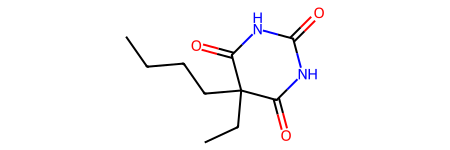

has similarity of 0.972 with
O=C2NC(=O)C1(CCCC1)C(=O)N2


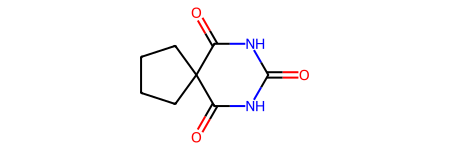

has similarity of 0.959 with
O=C2NC(=O)C1(CCCCC1)C(=O)N2


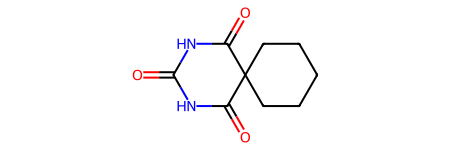

****************************************************************************************
Smiles: c1ccc2c(c1)ccc3c4ccccc4ccc23


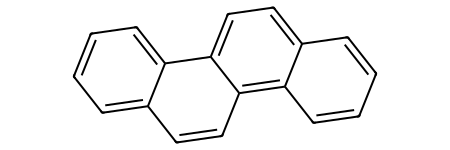

has similarity of 0.990 with
c1ccc2c(c1)c3ccccc3c4ccccc24


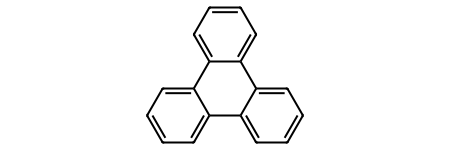

has similarity of 0.980 with
c1ccc2cc3cc4ccccc4cc3cc2c1


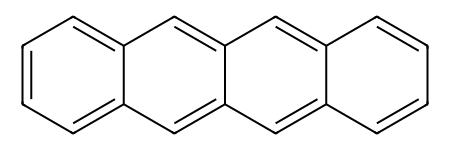

****************************************************************************************
Smiles: Clc1cccc(c1Cl)c2c(Cl)c(Cl)cc(Cl)c2Cl


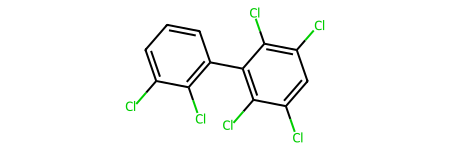

has similarity of 0.989 with
Clc1ccc(Cl)c(c1)c2cc(Cl)c(Cl)c(Cl)c2Cl


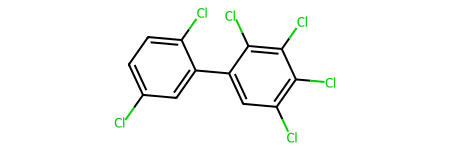

has similarity of 0.989 with
Clc1ccc(c(Cl)c1)c2cc(Cl)c(Cl)c(Cl)c2Cl


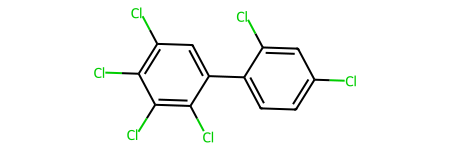

****************************************************************************************
Smiles: Cc1ccc(C)c2ccccc12


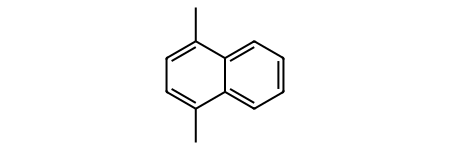

has similarity of 1.000 with
Cc1cccc2c(C)cccc12


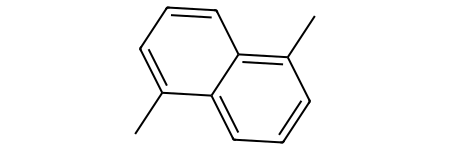

has similarity of 0.966 with
Cc1ccc2cc(C)ccc2c1


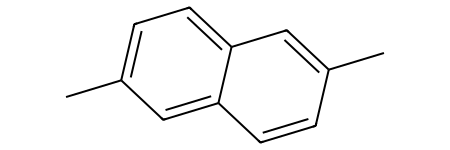

****************************************************************************************
Smiles: Cc1cc2c3ccccc3ccc2c4ccccc14


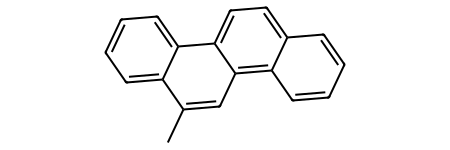

has similarity of 1.000 with
c1cccc2c3c(C)cc4ccccc4c3ccc12


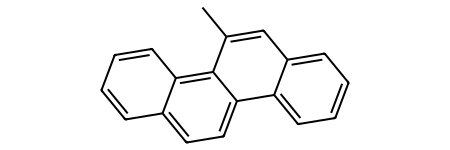

has similarity of 0.931 with
Cc1c(C)c2c3ccccc3ccc2c4ccccc14


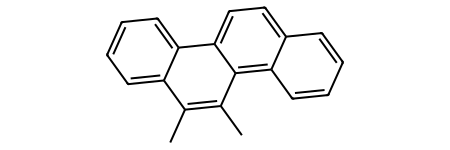

****************************************************************************************
Smiles: Clc1ccccc1c2ccccc2Cl


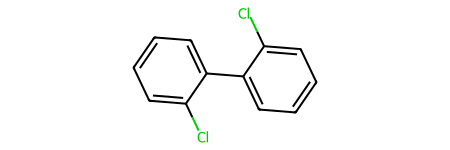

has similarity of 1.000 with
Clc1cccc(Cl)c1c2ccccc2


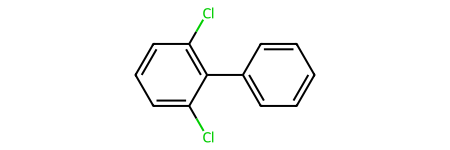

has similarity of 0.915 with
Clc1ccc(cc1)c2c(Cl)cccc2Cl


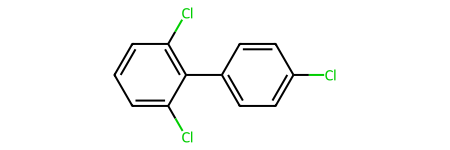

****************************************************************************************
Smiles: Clc1cccc(c1)c2cc(Cl)ccc2Cl


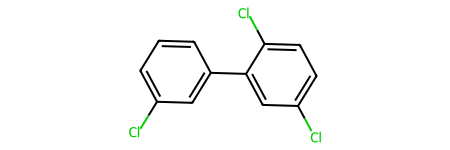

has similarity of 1.000 with
Clc1ccc(cc1)c2cc(Cl)ccc2Cl


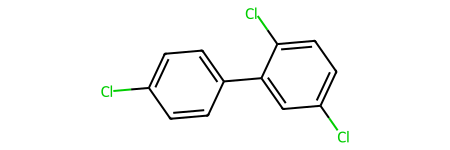

has similarity of 0.986 with
Clc1ccc(cc1)c2c(Cl)cccc2Cl


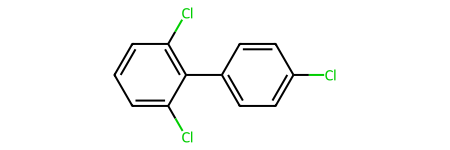

****************************************************************************************
Smiles: Cc1ncnc2nccnc12


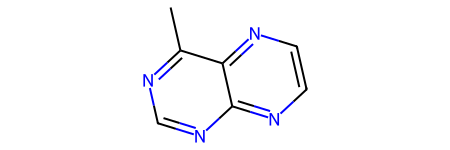

has similarity of 0.981 with
Cc2cnc1cncnc1n2


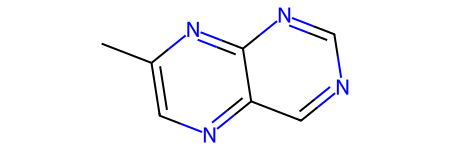

has similarity of 0.865 with
c2cnc1ncncc1n2


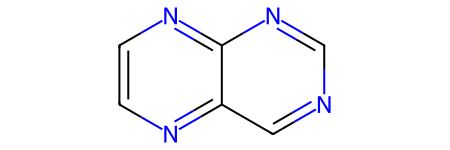

****************************************************************************************
Smiles: Cc1cc(C)c2ccccc2c1


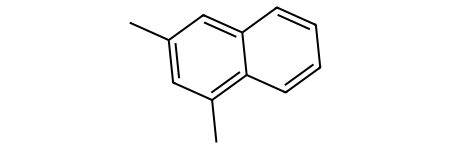

has similarity of 0.983 with
Cc1cccc2c(C)cccc12


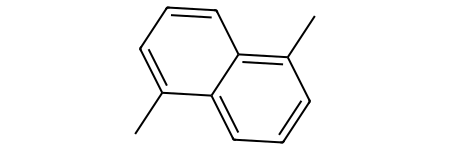

has similarity of 0.983 with
Cc1ccc2cc(C)ccc2c1


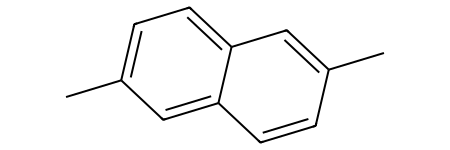

****************************************************************************************
Smiles: Clc1ccc(Cl)c(c1)c2ccc(Cl)c(Cl)c2


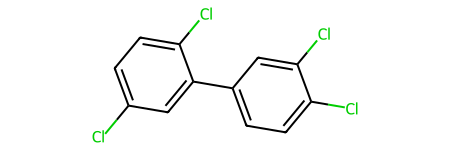

has similarity of 0.987 with
Clc1ccc(Cl)c(c1)c2cccc(Cl)c2Cl


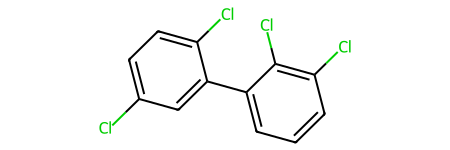

has similarity of 0.950 with
Clc1cccc(Cl)c1c2c(Cl)cccc2Cl


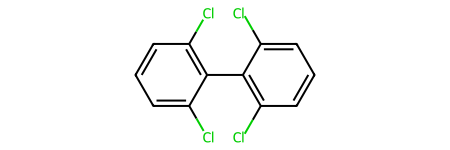

****************************************************************************************
Smiles: Clc1cccc(I)c1


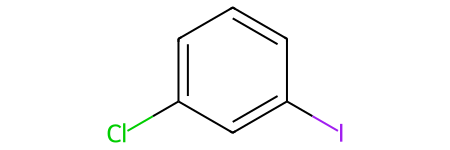

has similarity of 1.000 with
Clc1ccc(I)cc1


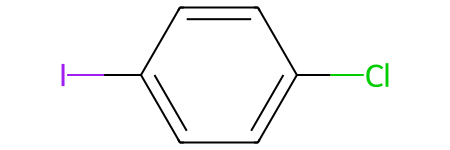

has similarity of 0.667 with
Clc1ccc(Br)cc1


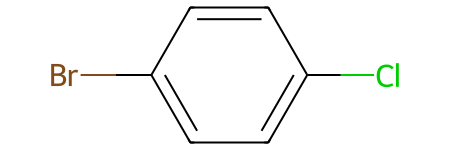

****************************************************************************************
Smiles: CC/C=C/C


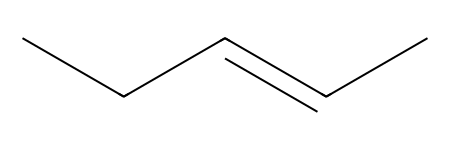

has similarity of 1.000 with
CC/C=C\C


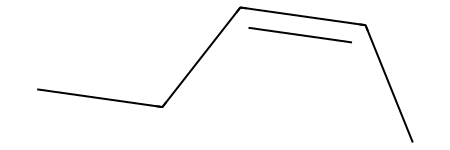

has similarity of 0.667 with
CC=C(C)C


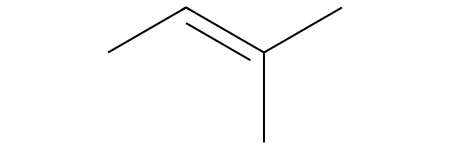

****************************************************************************************
Smiles: Oc1cccc(O)c1


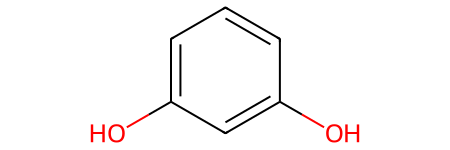

has similarity of 1.000 with
Oc1ccc(O)cc1


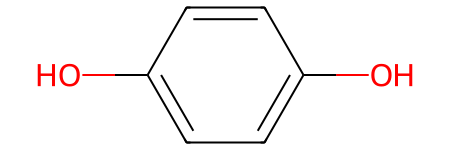

has similarity of 0.857 with
COc1ccccc1O


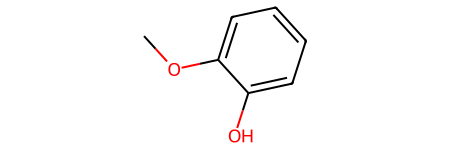

****************************************************************************************
Smiles: Clc1ccc(cc1)c2ccccc2Cl


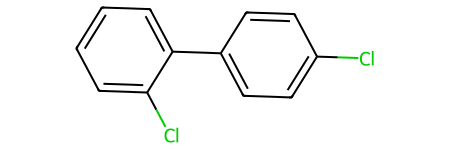

has similarity of 0.985 with
Clc1cccc(Cl)c1c2ccccc2


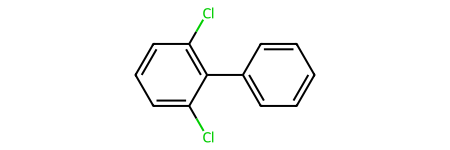

has similarity of 0.914 with
Clc1ccc(cc1)c2cc(Cl)ccc2Cl


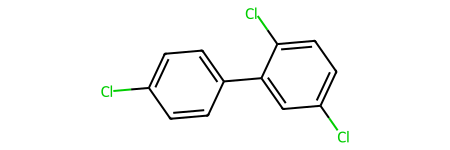

****************************************************************************************
Smiles: O=C1NC(=O)NC(=O)C1(CC)C(C)CC


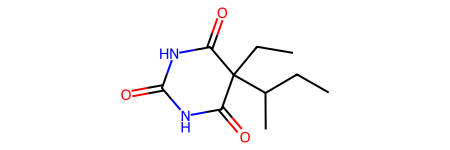

has similarity of 0.974 with
O=C2NC(=O)C1(CCCCC1)C(=O)N2


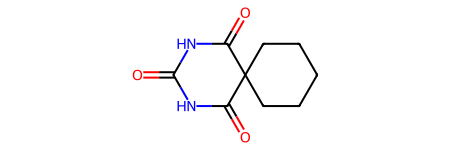

has similarity of 0.962 with
O=C2NC(=O)C1(CCCCCC1)C(=O)N2


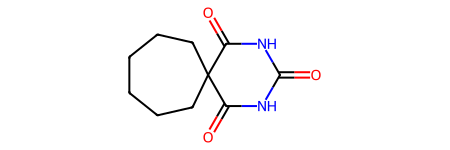

****************************************************************************************
Smiles: Oc1ccc2ccccc2c1


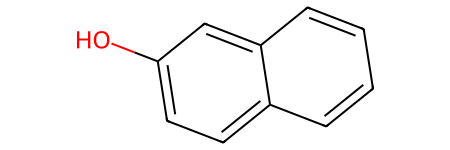

has similarity of 0.981 with
Oc1cccc2ccccc12


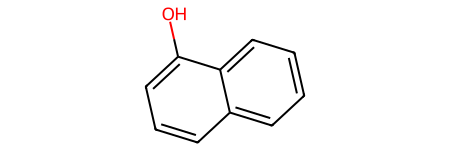

has similarity of 0.776 with
Cc1cccc2ccccc12


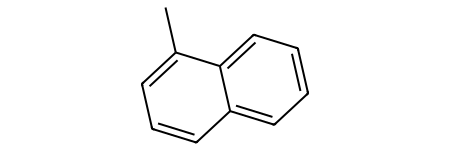

****************************************************************************************
Smiles: Oc2ccc1ncccc1c2


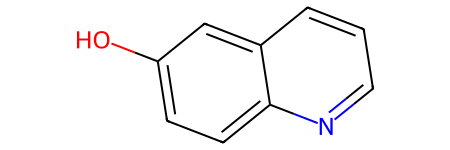

has similarity of 0.981 with
Oc1cccc2cccnc12


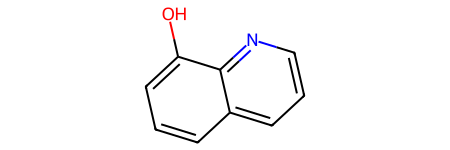

has similarity of 0.882 with
c1ccc2ncccc2c1


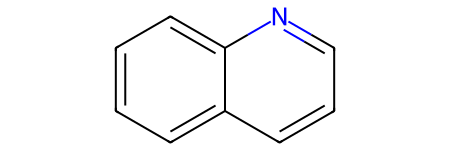

****************************************************************************************
Smiles: c1cc2cccc3c4cccc5cccc(c(c1)c23)c54


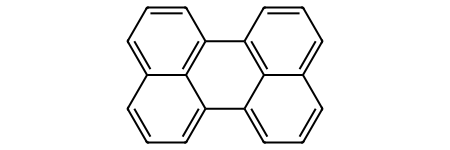

has similarity of 1.000 with
c1ccc2c(c1)c3cccc4ccc5cccc2c5c43


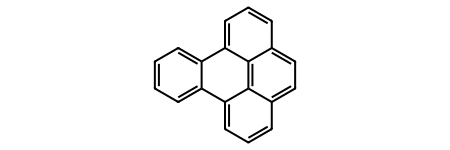

has similarity of 0.992 with
c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45


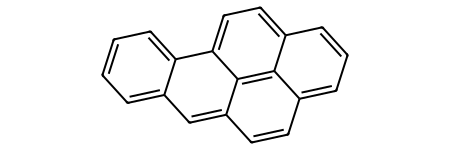

****************************************************************************************
Smiles: COc2cnc1ncncc1n2


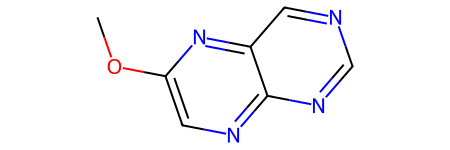

has similarity of 1.000 with
COc2cnc1cncnc1n2


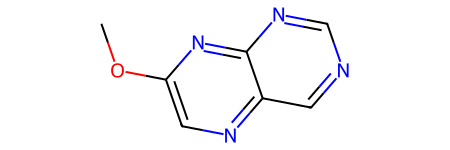

has similarity of 0.818 with
c2cnc1ncncc1n2


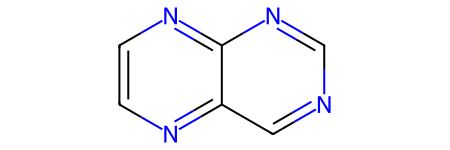

****************************************************************************************
Smiles: CC34CCC1C(CCC2CC(O)CCC12C)C3CCC4=O


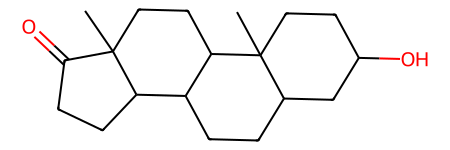

has similarity of 0.971 with
CC34CCC1C(CCC2CC(=O)CCC12C)C3CCC4O


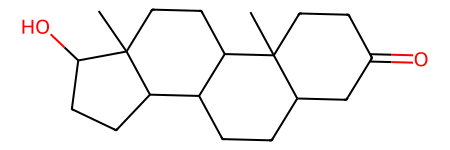

has similarity of 0.842 with
CC12CC(O)C3C(CCC4=CC(=O)CCC34C)C2CCC1C(=O)CO


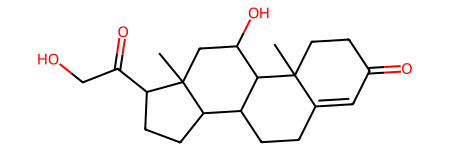

****************************************************************************************
Smiles: Oc1ccc(Cl)cc1


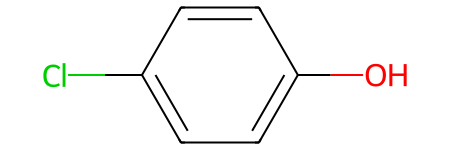

has similarity of 1.000 with
Oc1cccc(Cl)c1


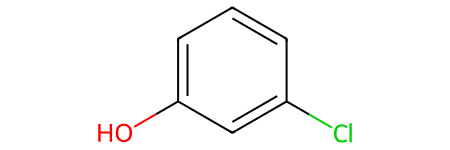

has similarity of 0.968 with
Oc1ccccc1Cl


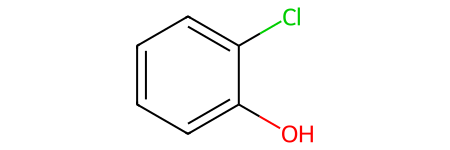

****************************************************************************************
Smiles: O=C1N(COC(=O)CCCC)C(=O)C(N1)(c2ccccc2)c3ccccc3


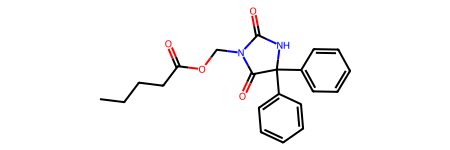

has similarity of 0.978 with
O=C1N(COC(=O)CCC)C(=O)C(N1)(c2ccccc2)c3ccccc3


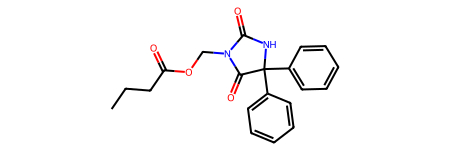

has similarity of 0.600 with
CN(C)C(=O)C(c1ccccc1)c2ccccc2


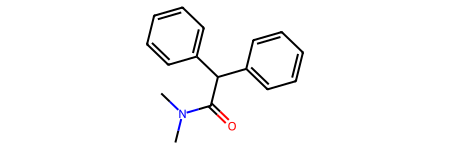

****************************************************************************************
Smiles: COc1ccc(Cl)cc1


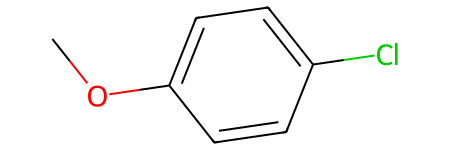

has similarity of 0.971 with
COc1ccccc1Cl


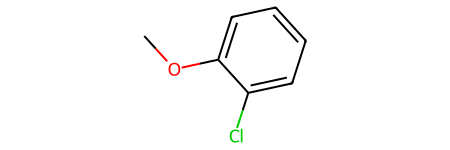

has similarity of 0.882 with
Oc1cccc(Cl)c1


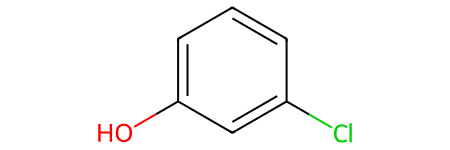

****************************************************************************************
Smiles: Cc1ccccc1N(=O)=O


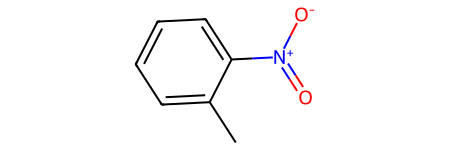

has similarity of 0.976 with
Cc1ccc(cc1)N(=O)=O


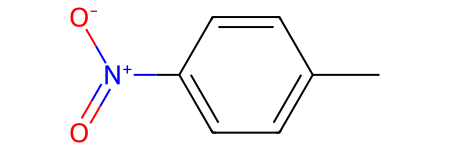

has similarity of 0.976 with
Cc1cccc(c1)N(=O)=O


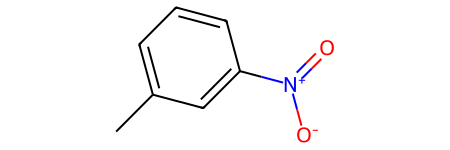

****************************************************************************************
Smiles: CCc1ccccc1C


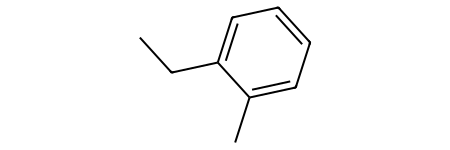

has similarity of 0.971 with
CCc1ccc(C)cc1


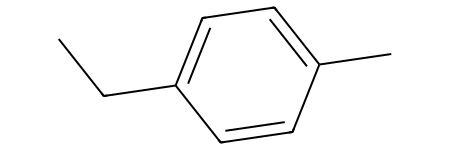

has similarity of 0.886 with
Cc1ccccc1C


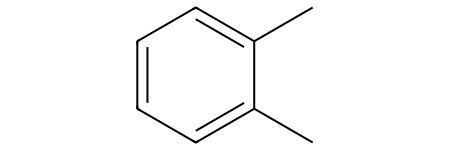

****************************************************************************************
Smiles: Cc1ccc2c(ccc3ccccc32)c1


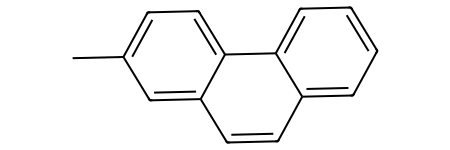

has similarity of 0.988 with
Cc1cccc2c1ccc3ccccc32


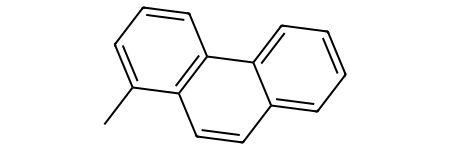

has similarity of 0.963 with
Cc1c2ccccc2cc3ccccc13


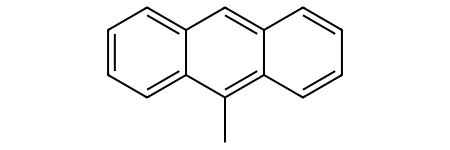

****************************************************************************************
Smiles: COc1ccc(cc1)N(=O)=O


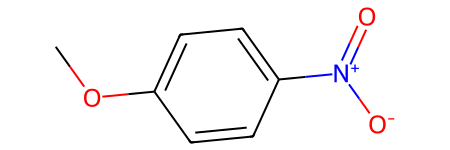

has similarity of 0.978 with
COc1ccccc1N(=O)=O


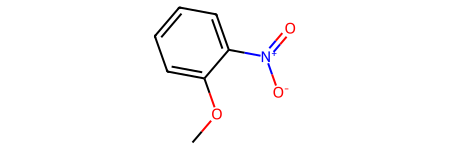

has similarity of 0.680 with
Cc1ccc(cc1)N(=O)=O


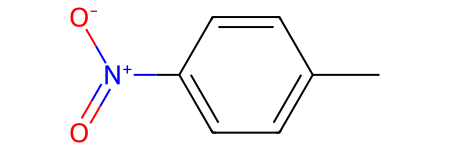

****************************************************************************************
Smiles: c1ccc2c(c1)c3cccc4c3c2cc5ccccc54


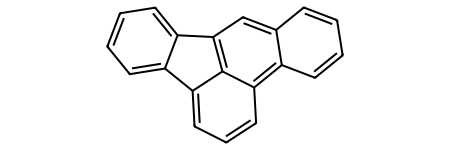

has similarity of 0.984 with
c1ccc2c3c(ccc2c1)c4cccc5cccc3c45


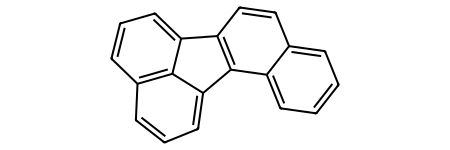

has similarity of 0.677 with
c1ccc2cc3cc4ccccc4cc3cc2c1


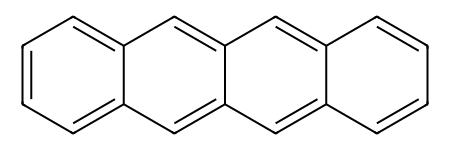

****************************************************************************************
Smiles: Clc1ccc(cc1)c2cccc(Cl)c2Cl


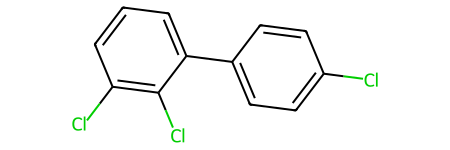

has similarity of 0.986 with
Clc1ccc(cc1)c2cc(Cl)ccc2Cl


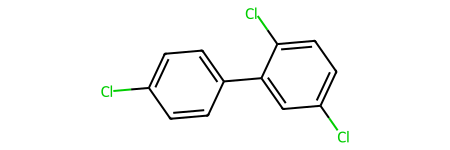

has similarity of 0.972 with
Clc1ccc(cc1)c2c(Cl)cccc2Cl


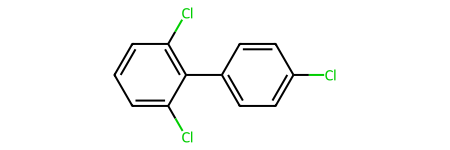

****************************************************************************************
Smiles: CC(C)c1ccccc1C


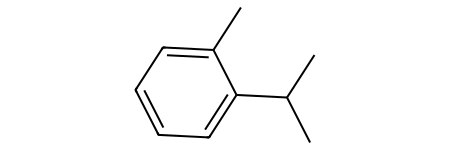

has similarity of 0.976 with
CC(C)c1ccc(C)cc1


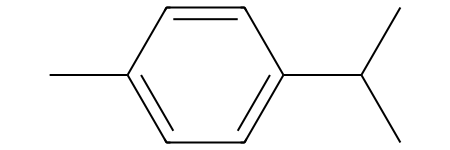

has similarity of 0.870 with
C1CCc2ccccc2C1


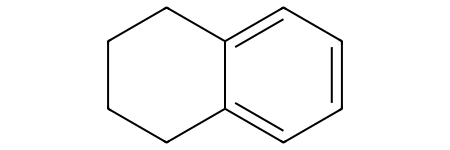

****************************************************************************************
Smiles: Nc1cccc(Cl)c1


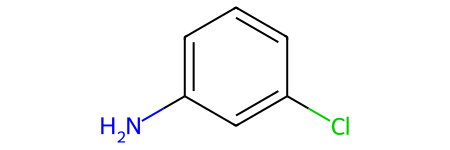

has similarity of 1.000 with
Nc1ccc(Cl)cc1


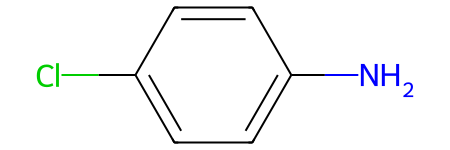

has similarity of 0.800 with
Nc1ccccc1


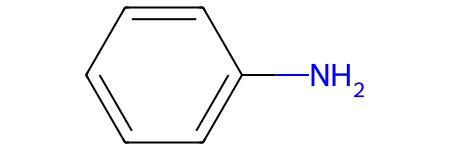

****************************************************************************************
Smiles: c3ccc2nc1ccccc1cc2c3


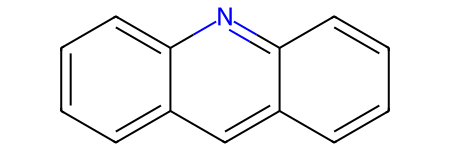

has similarity of 0.972 with
c1ccc2c(c1)[nH]c3ccccc32


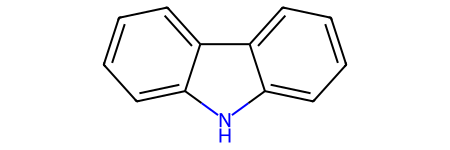

has similarity of 0.883 with
c1ccc2c(c1)cnc3ccccc23


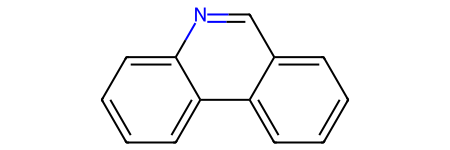

****************************************************************************************
Smiles: Cc1cccc(O)c1


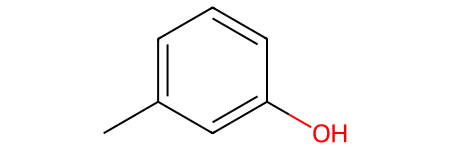

has similarity of 1.000 with
Cc1ccc(O)cc1


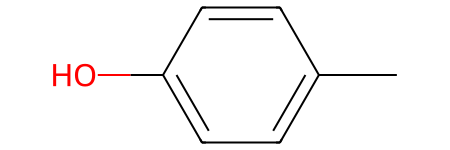

has similarity of 0.833 with
Cc1cc(C)cc(O)c1


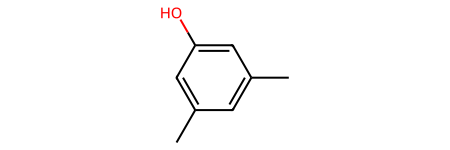

****************************************************************************************
Smiles: O=N(=O)c1ccc(cc1)N(=O)=O


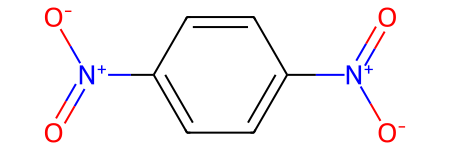

has similarity of 1.000 with
O=N(=O)c1cccc(c1)N(=O)=O


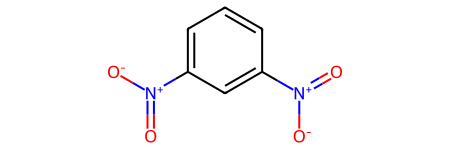

has similarity of 0.980 with
O=N(=O)c1ccccc1N(=O)=O


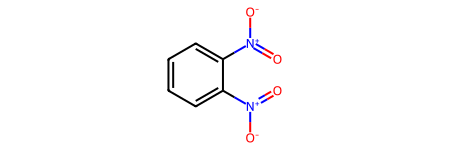

****************************************************************************************
Smiles: Cc1ccc2ccccc2c1


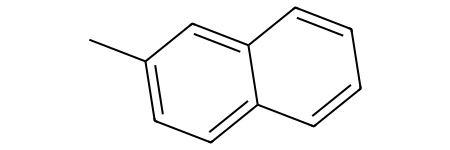

has similarity of 0.981 with
Cc1cccc2ccccc12


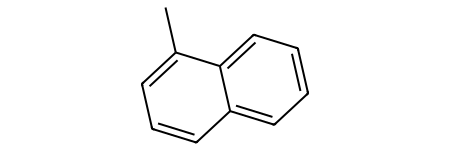

has similarity of 0.895 with
Cc1ccc2cc(C)ccc2c1


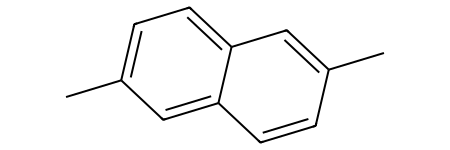

****************************************************************************************
Smiles: C/C=C/C=O


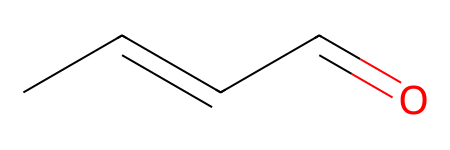

has similarity of 1.000 with
CC=CC=O


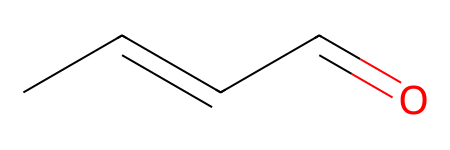

has similarity of 0.500 with
CC/C=C\C


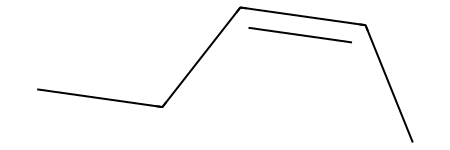

****************************************************************************************
Smiles: Cc1ccc2cc3ccccc3cc2c1


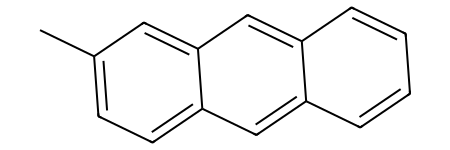

has similarity of 0.975 with
Cc1cccc2c1ccc3ccccc32


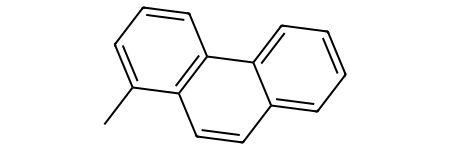

has similarity of 0.975 with
Cc1c2ccccc2cc3ccccc13


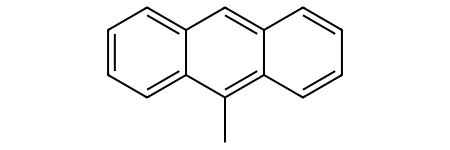

****************************************************************************************
Smiles: Cc1cccc(C)c1C


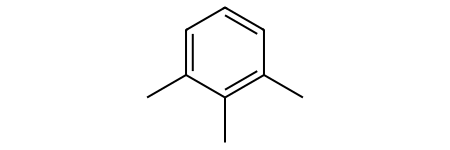

has similarity of 0.974 with
Cc1ccc(C)c(C)c1


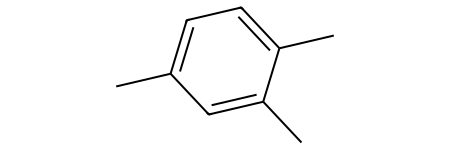

has similarity of 0.947 with
Cc1cc(C)cc(C)c1


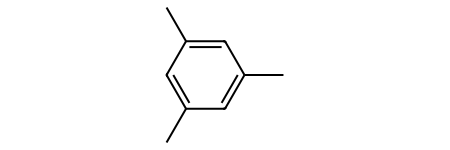

****************************************************************************************
Smiles: Nc1ccccc1N(=O)=O


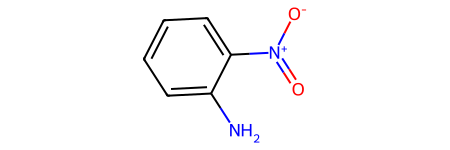

has similarity of 0.976 with
Nc1cccc(c1)N(=O)=O


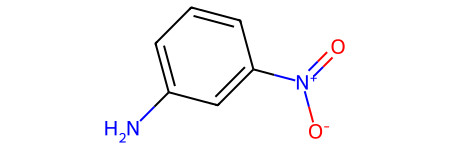

has similarity of 0.804 with
O=N(=O)c1ccccc1N(=O)=O


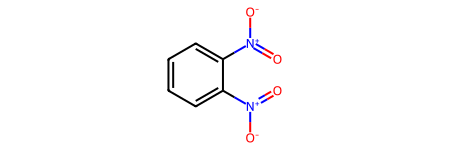

****************************************************************************************
Smiles: Clc1cccc(c1Cl)c2cccc(Cl)c2Cl


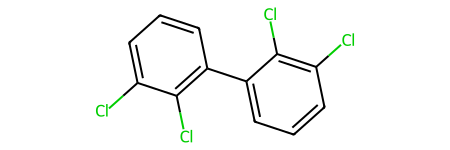

has similarity of 0.987 with
Clc1ccc(Cl)c(c1)c2cccc(Cl)c2Cl


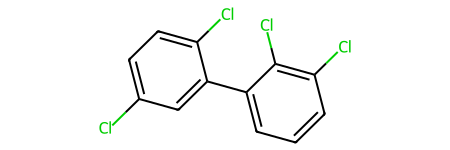

has similarity of 0.951 with
Clc1cccc(Cl)c1c2c(Cl)cccc2Cl


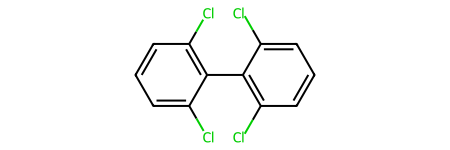

****************************************************************************************
Smiles: c1(Br)c(Br)cc(Br)cc1


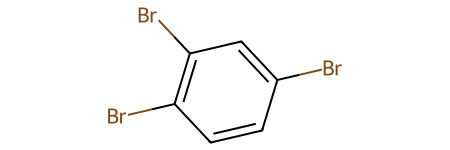

has similarity of 0.973 with
Brc1cc(Br)cc(Br)c1


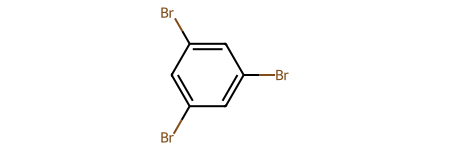

has similarity of 0.838 with
Brc1ccccc1Br


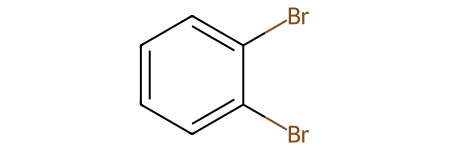

****************************************************************************************
Smiles: c1(O)c(C)ccc(C(C)C)c1


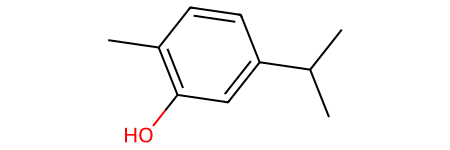

has similarity of 1.000 with
CC(C)c1ccc(C)cc1O


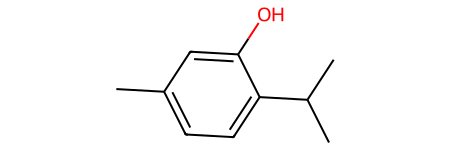

has similarity of 0.851 with
CC(C)c1ccc(C)cc1


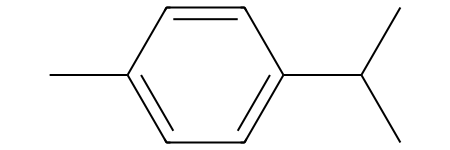

****************************************************************************************
Smiles: Nc1ccc(cc1)N(=O)=O


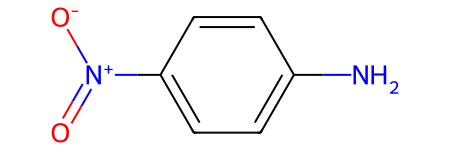

has similarity of 1.000 with
Nc1cccc(c1)N(=O)=O


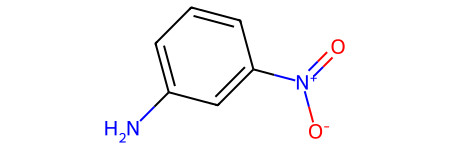

has similarity of 0.800 with
O=N(=O)c1cccc(c1)N(=O)=O


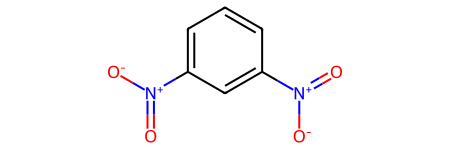

****************************************************************************************
Smiles: ClC(Cl)C(c1ccc(Cl)cc1)c2ccc(Cl)cc2


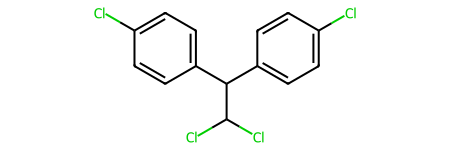

has similarity of 0.988 with
ClC(Cl)C(c1ccc(Cl)cc1)c2ccccc2Cl


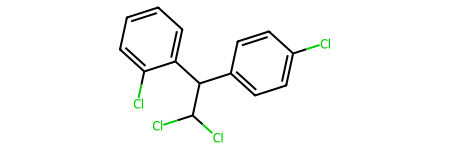

has similarity of 0.902 with
Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl


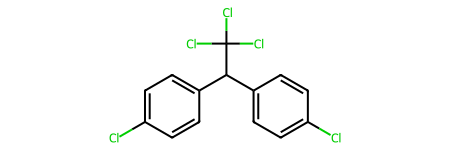

****************************************************************************************
Smiles: CC(=O)OC3CCC4C2CCC1=CC(=O)CCC1(C)C2CCC34C


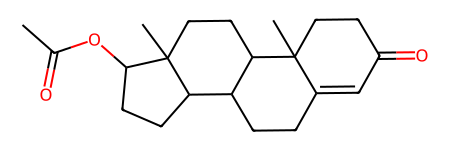

has similarity of 0.974 with
CCC(=O)OC3CCC4C2CCC1=CC(=O)CCC1(C)C2CCC34C


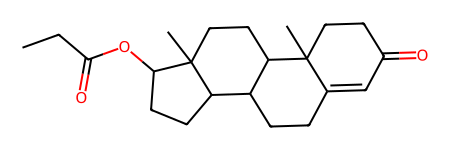

has similarity of 0.925 with
CC(=O)OC3(C)CCC4C2CCC1=CC(=O)CCC1(C)C2CCC34C


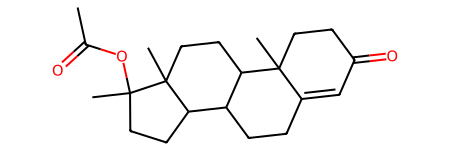

****************************************************************************************
Smiles: CCCC1CCCC1


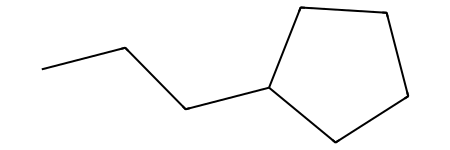

has similarity of 1.000 with
CCC1CCCCC1


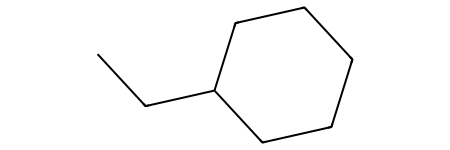

has similarity of 0.903 with
C/C1CCCCC1\C


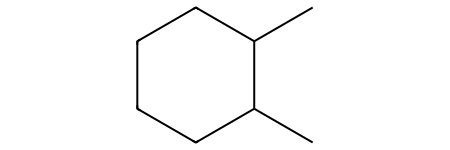

****************************************************************************************
Smiles: Oc1ccc(Cl)c(Cl)c1


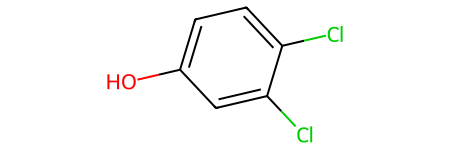

has similarity of 0.973 with
Oc1cc(Cl)cc(Cl)c1


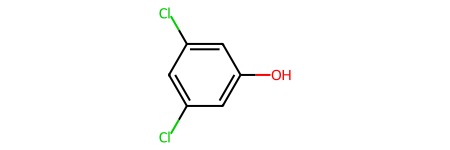

has similarity of 0.923 with
Oc1c(Cl)cccc1Cl


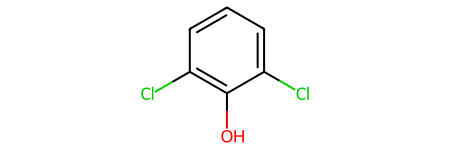

****************************************************************************************
Smiles: Fc1cccc(F)c1


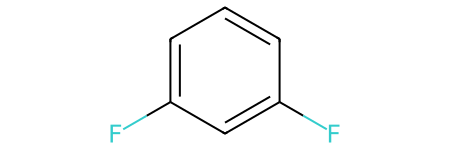

has similarity of 1.000 with
Fc1ccc(F)cc1


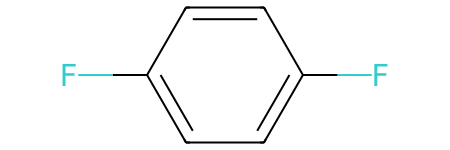

has similarity of 0.667 with
Fc1cccc(Br)c1


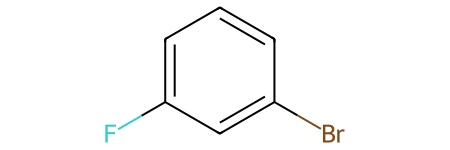

****************************************************************************************
Smiles: c1ccc2cc3c4cccc5cccc(c3cc2c1)c45


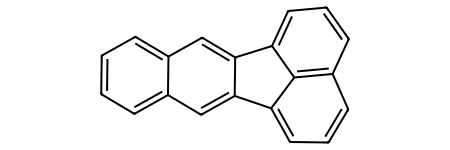

has similarity of 0.992 with
c1ccc2c3c(ccc2c1)c4cccc5cccc3c45


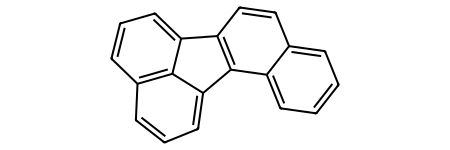

has similarity of 0.669 with
c1ccc2cc3cc4ccccc4cc3cc2c1


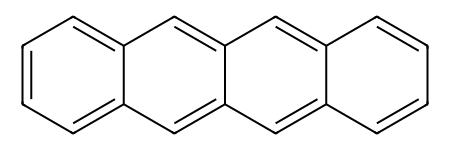

****************************************************************************************
Smiles: Brc1ccc(Br)cc1


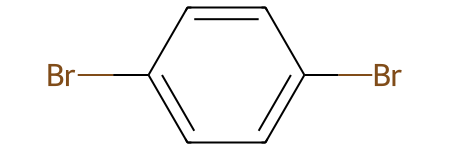

has similarity of 1.000 with
Brc1cccc(Br)c1


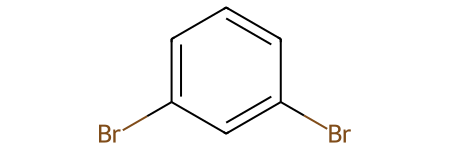

has similarity of 0.968 with
Brc1ccccc1Br


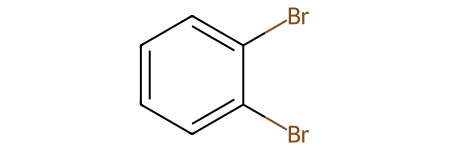

****************************************************************************************
Smiles: COc1ncnc2nccnc12


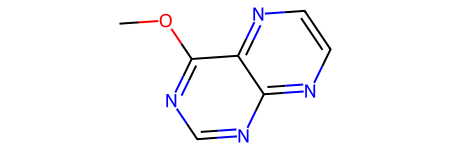

has similarity of 0.982 with
COc2cnc1cncnc1n2


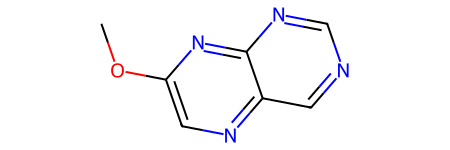

has similarity of 0.804 with
c2cnc1ncncc1n2


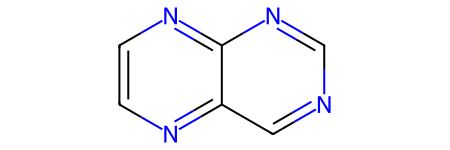

****************************************************************************************
Smiles: Clc1ccc(Cl)cc1


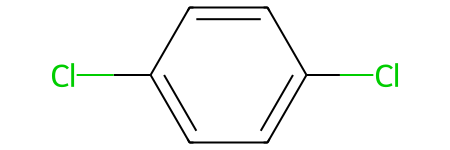

has similarity of 1.000 with
Clc1cccc(Cl)c1


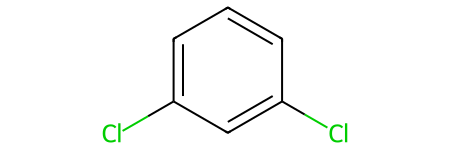

has similarity of 0.833 with
Oc1cc(Cl)cc(Cl)c1


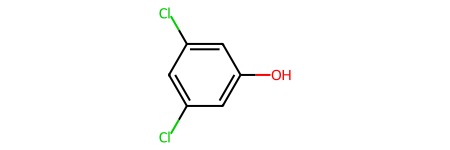

****************************************************************************************
Smiles: CC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3CCC21C


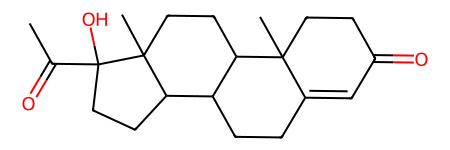

has similarity of 0.975 with
CC12CC(O)C3C(CCC4=CC(=O)CCC34C)C2CCC1C(=O)CO


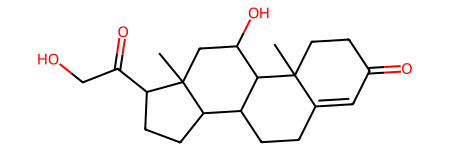

has similarity of 0.945 with
CC13CCC(=O)C=C1CCC4C2CCC(C(=O)CO)C2(CC(O)C34)C=O


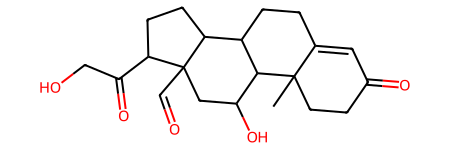

****************************************************************************************
Smiles: Cc1ccc(O)c(C)c1


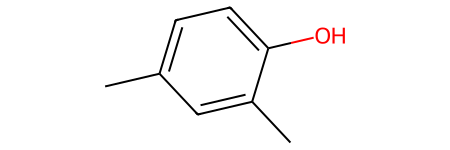

has similarity of 0.973 with
Cc1cc(C)cc(O)c1


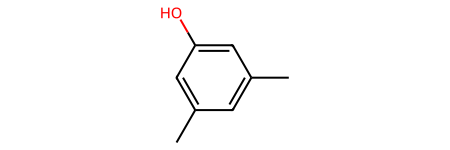

has similarity of 0.947 with
Cc1ccc(O)cc1C


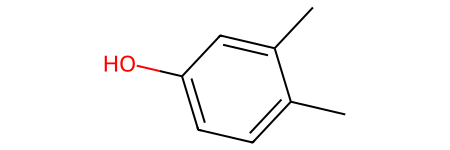

****************************************************************************************
Smiles: Clc1ccc(c(Cl)c1)c2cc(Cl)ccc2Cl


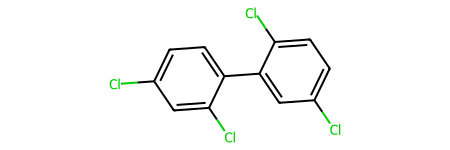

has similarity of 0.987 with
Clc1ccc(Cl)c(c1)c2cccc(Cl)c2Cl


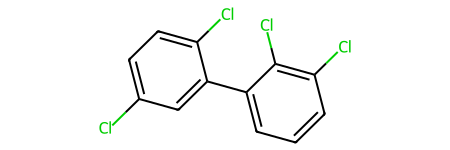

has similarity of 0.975 with
Clc1cccc(Cl)c1c2c(Cl)cccc2Cl


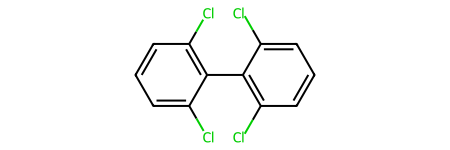

****************************************************************************************
Smiles: CC1OC(CC(O)C1O)OC2C(O)CC(OC2C)OC8C(O)CC(OC7CCC3(C)C(CCC4C3CC(O)C5(C)C(CCC45O)C6=CC(=O)OC6)C7)OC8C


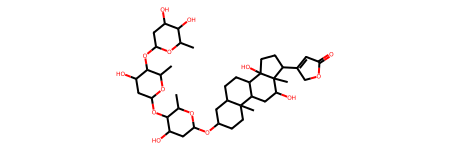

has similarity of 0.976 with
CC1OC(CC(O)C1O)OC2C(O)CC(OC2C)OC8C(O)CC(OC7CCC3(C)C(CCC4C3CCC5(C)C(CCC45O)C6=CC(=O)OC6)C7)OC8C


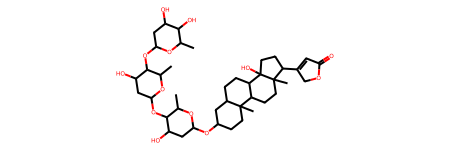

has similarity of 0.495 with
CC5(C)OC4CC3C2CCC1=CC(=O)C=CC1(C)C2(F)C(O)CC3(C)C4(O5)C(=O)CO


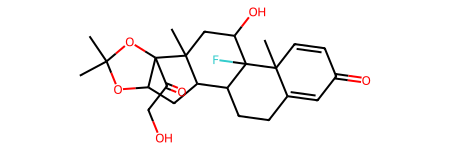

****************************************************************************************
Smiles: Clc1ccc(c(Cl)c1Cl)c2ccc(Cl)c(Cl)c2Cl


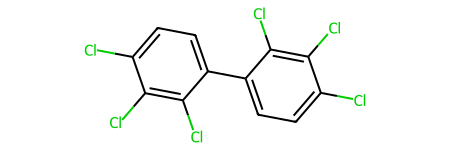

has similarity of 0.989 with
Clc1ccc(cc1Cl)c2cc(Cl)c(Cl)c(Cl)c2Cl


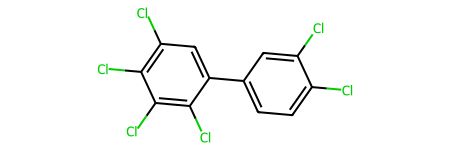

has similarity of 0.989 with
Clc1ccc(Cl)c(c1)c2cc(Cl)c(Cl)c(Cl)c2Cl


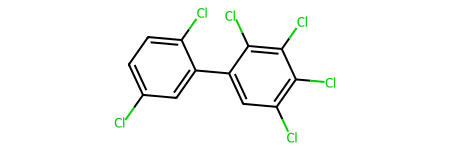

****************************************************************************************
Smiles: O=C1NC(=O)NC(=O)C1(CC)C(C)CCC


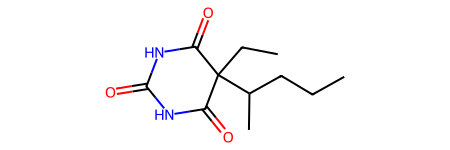

has similarity of 0.975 with
O=C2NC(=O)C1(CCCCCC1)C(=O)N2


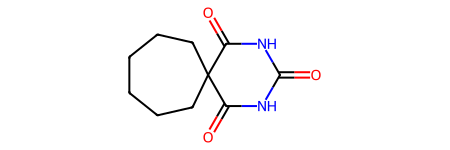

has similarity of 0.963 with
O=C2NC(=O)C1(CCCCCCC1)C(=O)N2


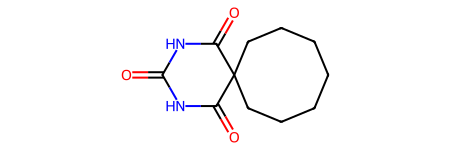

****************************************************************************************
Smiles: COc1cccc(Cl)c1


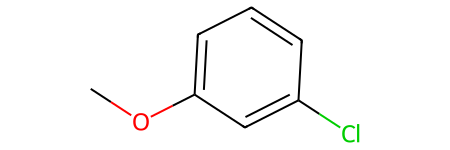

has similarity of 0.971 with
COc1ccccc1Cl


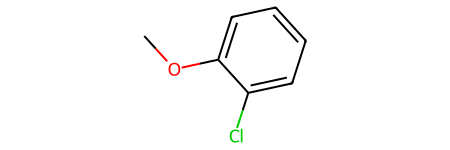

has similarity of 0.882 with
Oc1cccc(Cl)c1


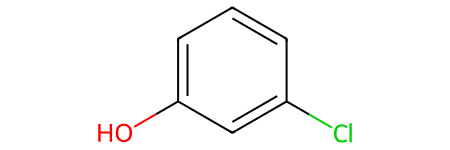

****************************************************************************************
Smiles: Oc1ccc(Cl)cc1Cl


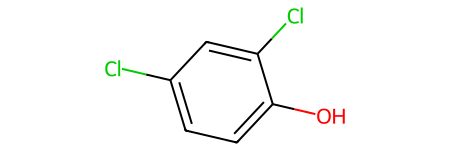

has similarity of 0.974 with
Oc1c(Cl)cccc1Cl


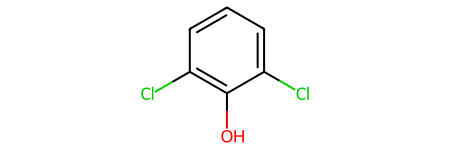

has similarity of 0.973 with
Oc1cc(Cl)cc(Cl)c1


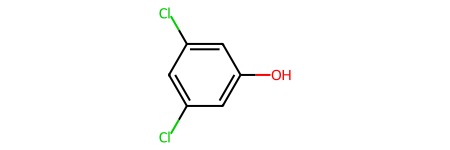

****************************************************************************************
Smiles: O=C1N(COC(=O)CC)C(=O)C(N1)(c2ccccc2)c3ccccc3


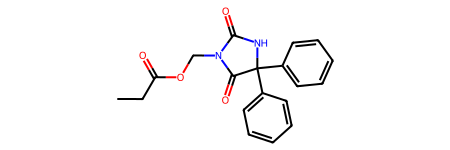

has similarity of 0.977 with
O=C1N(COC(=O)CCC)C(=O)C(N1)(c2ccccc2)c3ccccc3


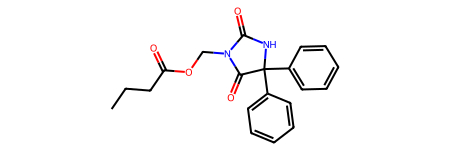

has similarity of 0.628 with
CN(C)C(=O)C(c1ccccc1)c2ccccc2


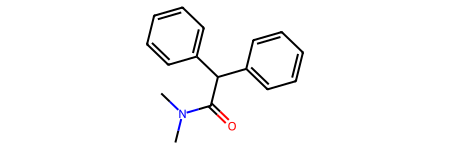

In [9]:
# visualize the smiles that have high similarity
for i in range(similarity_matrix.shape[0]):
    temp_sim_array = similarity_matrix[i, :]
    # find the 2 most similar neighbors
    indices = temp_sim_array.argsort()[-2:][::-1]
    if temp_sim_array[indices[0]] > 0.97:
        print('*'*88)
        smi1 = smiles_list1[i]
        print(f'Smiles: {smi1}')
        display(Chem.MolFromSmiles(smi1))
        for idx in indices:
            print(f'has similarity of {temp_sim_array[idx]:.3f} with')
            smi2 = smiles_list2[idx]
            print(smi2)
            display(Chem.MolFromSmiles(smi2))